In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2024-05-16 20:59:45.454711


# Auton hinnan ennustaminen

Olen lainannut ideoita lähteestä https://www.kaggle.com/mohaiminul101/car-price-prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# train_test_split osaa jakaa datan opetusdataan ja testidataan
from sklearn.model_selection import train_test_split

# Käytettävät mallit
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

## Funktio mallin sovittamiseen ja tarkasteluun

Jos samaa koodia käytetään toistuvasti, niin siitä kannattaa tehdä funktio. Seuraavan solun mallinna-funktiolle annetaan parametrina sovitettava malli. Funktio sovittaa mallin, laskee selityskertoimet opetusdatalle ja testidatalle sekä piirtää mallin hyvyyden arviontiin sopivat grafiikat.

In [3]:
def mallinna(malli):
    
    # Mallin sovitus opetusdataan
    malli.fit(X_train, y_train)
            
    # Selityskertoimet opetusdatalle ja testidatalle
    R2_train_malli = malli.score(X_train, y_train)
    R2_test_malli = malli.score(X_test, y_test)
        
    # Selityskertoimien tulostus
    print(f'Opetusdatan selityskerroin {R2_train_malli:.3f}')
    print(f'Testidatan selityskerroin {R2_test_malli:.3f}')
       
    # Opetusdatan virhetermit kaaviona
    y_pred_train = malli.predict(X_train)
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax[0].set_title('Ennustevirheiden jakauma opetusdatassa')
    sns.histplot((y_train-y_pred_train), kde=True, ax=ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Toteutuneet ja ennustetut hajontakaaviona testidatalle
    y_pred_test = malli.predict(X_test)
    ax[1].set_title('Toteutuneet ja ennustetut testidatassa')
    ax[1].scatter(x=y_test, y=y_pred_test)
    ax[1].set_xlabel('toteutunut')
    ax[1].set_ylabel('ennuste')

    # Palautetaan funktion tuloksena malli
    return(malli)

## Datan tarkastelua

In [4]:
df = pd.read_csv('https://taanila.fi/car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
# Muunnetaan 'Year' auton iäksi olettaen, että data vuodelta 2020
df['Age'] = 2020 - df['Year']
df = df.drop('Year', axis=1)

In [8]:
# Pudotetaan 'Car_Name' pois, koska sitä ei tarvita
df = df.drop('Car_Name', axis=1)

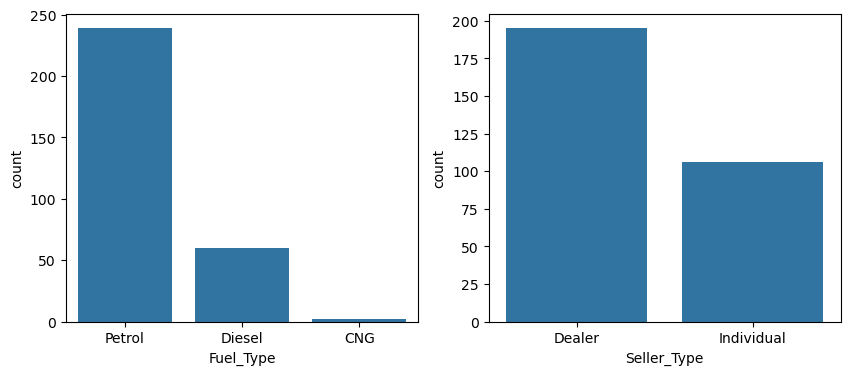

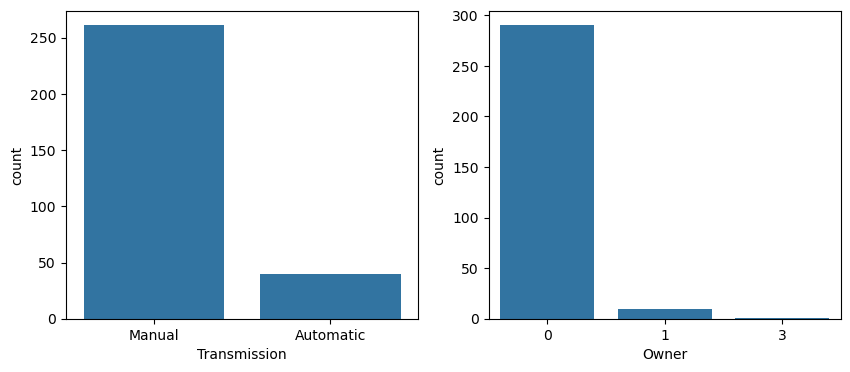

In [9]:
# Kategoristen muuttujien jakaumat

cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']

for i in range(0, 3, 2):
    fig = plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.countplot(x=cat_cols[i], data=df)
    plt.subplot(1, 2, 2)
    sns.countplot(x=cat_cols[i + 1], data=df)

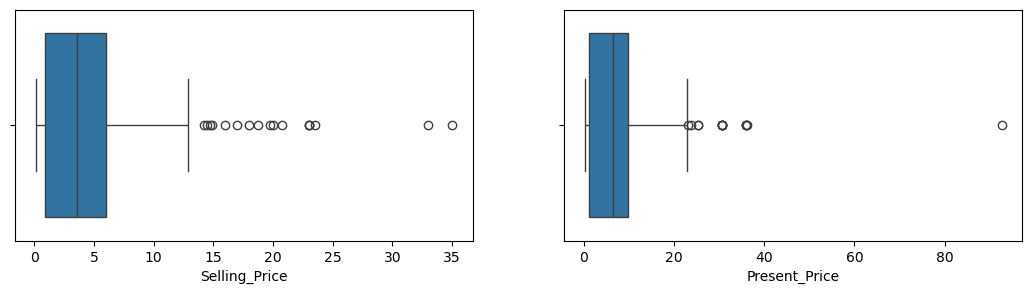

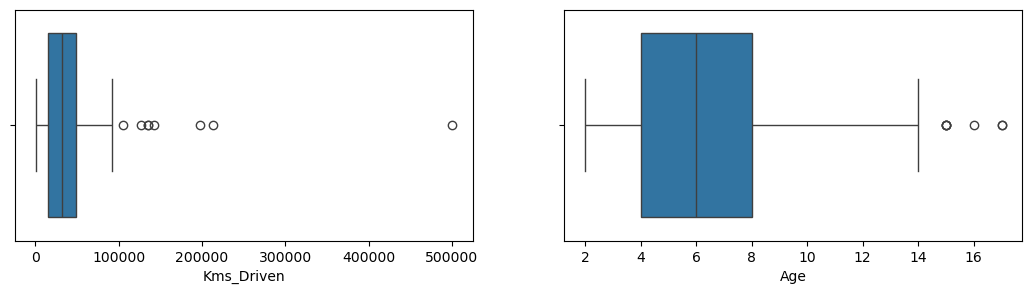

In [10]:
# Määrällisten muuttujien jakaumat

num_cols = ['Selling_Price', 'Present_Price', 'Kms_Driven', 'Age']

for i in range(0, 3, 2):
    fig = plt.figure(figsize=(13, 3))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=num_cols[i], data=df)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=num_cols[i + 1], data=df)

<Axes: >

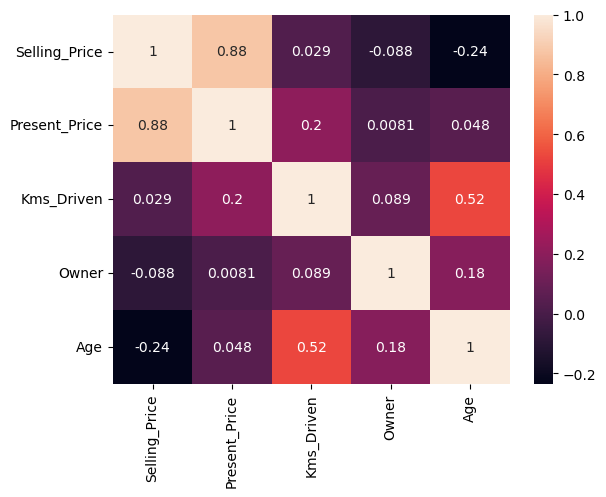

In [11]:
# Korrelaatiot
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [12]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


Useimmissa koneoppimisen malleissa ei saa olla selittävinä muuttujina kategorisia muuttujia. Kategoriset muuttujat voidaan kuitenkin muuntaa dikotomisiksi muuttujiksi, jotka kelpaavat selittäviksi muuttujiksi. Pandas-kirjaston **get_dummies**-funktio muuntaa kategoriset muuttujat dikotomisiksi.

Esimerkiksi **Fuel_Type**-muuttuja voidaan muuntaa kolmeksi dikotomiseksi muuttujaksi:

* **Fuel_Type_CNG**, joka saa arvon 1 (True), jos polttoaine on CNG ja muutoin arvon 0 (False)
* **Fuel_Type_Diesel**, joka saa arvon 1 (True), jos polttoaine on Diesel ja muutoin arvon 0 (False)
* **Fuel_Type_Petrol**, joka saa arvon 1 (True), jos polttoaine on Petrol ja muutoin arvon 0 (False)
  
Käytännössä yksi dikotomisista muuttujista voidaan jättää pois menettämättä informaatiota: vaikka Fuel_Type_CNG-muuttuja jätetään pois, niin Fuel_Type_Diesel = 0 ja Fuel_Type_Petrol = 0 tarkoittaa CNG:tä.  Yhden dikotomisen muuttujan poisjättäminen hoituu parametrilla **drop_first=True**.

In [13]:
# Kategoriset muuttujat dummy-muuttujiksi
df = pd.get_dummies(data=df, drop_first=True) 

In [14]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,False,True,False,True
1,4.75,9.54,43000,0,7,True,False,False,True
2,7.25,9.85,6900,0,3,False,True,False,True
3,2.85,4.15,5200,0,9,False,True,False,True
4,4.60,6.87,42450,0,6,True,False,False,True


## Mallien sovittaminen

In [15]:
# Selittävät muuttujat
X = df.drop('Selling_Price', axis=1)

# Selitettävä/ennustettava muuttuja
y = df['Selling_Price']

In [16]:
# Jako opetus- ja testidataan
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

### Lineaarinen regressio

Opetusdatan selityskerroin 0.888
Testidatan selityskerroin 0.842


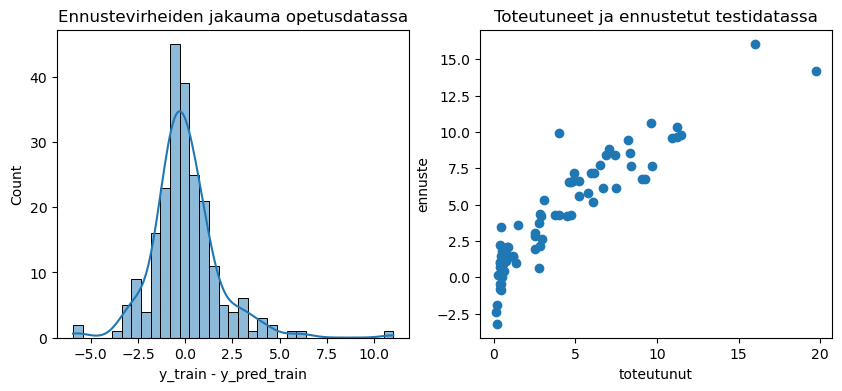

In [17]:
malli = LinearRegression()

# Tässä hyödynnän aiemmin määriteltyä mallinna-funktiota
lr = mallinna(malli)

### Satunnaismetsä

Opetusdatan selityskerroin 0.986
Testidatan selityskerroin 0.951


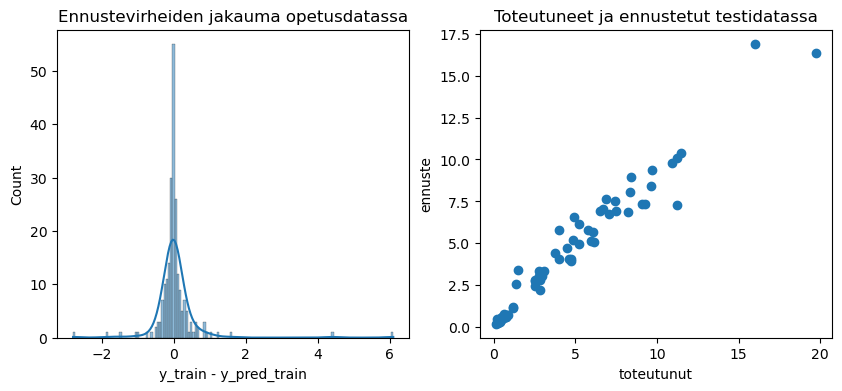

In [18]:
malli = RandomForestRegressor()
rfr = mallinna(malli)

### Gradient Boosting

Opetusdatan selityskerroin 0.997
Testidatan selityskerroin 0.958


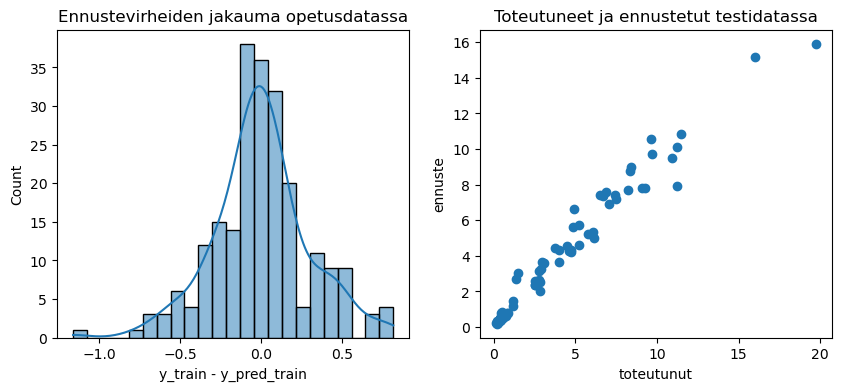

In [19]:
malli = GradientBoostingRegressor()
gbr = mallinna(malli)

## Ennusteiden laskeminen

Kokeillaan kahden auton hintojen ennustamista. Lasken ennusteet gradienttitehostusta käyttäen.

In [20]:
# Uuden datan muodostaminen
df_new = pd.DataFrame([[6, 40000, 0, 4, 0, 1, 0, 0], [6, 80000, 0, 4, 1, 1, 0, 0]],
                     columns=['Present_Price', 'Kms_Driven', 'Owner', 'Age', 'Fuel_Type_Diesel',
                     'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual'])

print('Gradienttitehostusregression hintaennusteet: ', gbr.predict(df_new))

Gradienttitehostusregression hintaennusteet:  [4.93561603 5.24532615]
